https://github.com/KJ-1289/432-Foundations-of-Data-Engineering

In [469]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import random
import time
import warnings
warnings.filterwarnings("ignore")

**1. Create the following three datasets:**
<br>* Create a list of 100,000 names (randomly pick 10 characters e.g. abcdefghij, any order is fine, just make sure there are no duplicates in the name) and store those names in an unsorted list.
<br>* Now store the above names in a set (https://docs.python.org/3.7/library/stdtypes.html ). 
<br>* Make a separate copy of the list and sort it using any sorting algorithm that you have learned so far and justify why are you using it. Capture the time it takes to sort the list.

In [470]:
def create_stringarrays(array_length):
    string_arrays = [''.join(random.choices(string.ascii_letters, k=10)) for j in range(array_length)]
    if len(set(string_arrays)) < array_length:
        string_arrays = [''.join(random.choices(string.ascii_letters, k=10)) for j in range(array_length)]
        create_stringarrays(array_length)
    else:
        return string_arrays

In [471]:
names_unsrt = create_stringarrays(100000)

#Check for duplicates
len(np.unique(names_unsrt)) != len(names_unsrt)

False

In [472]:
names_set = set(names_unsrt)

In [473]:
def quicksort(array):
    if len(array) < 2:
        return array
    else:
        pivot = array[0]
        less = [i for i in array [1:] if i <= pivot]
        greater = [i for i in array[1:] if i > pivot]
        return quicksort(less) + [pivot] + quicksort(greater)

In [474]:
start_time = time.clock()
names_srt = quicksort(names_unsrt)
end_time = time.clock()
run_time = (end_time - start_time) * 1000
qs_time = run_time
round(qs_time, 3)

275.103

At this point you should have three collections: 
(1) an unsorted list of names,
(2) a set of those same names, and
(3) a sorted list of the same names.  

Something like this:
names_unsrt = ['B', 'X', 'T'],
names_set = {'B', 'X', 'T'}, and
names_srt = ['B', 'T', 'X'] 

**2. Pick the names from the unsorted array that are at 10,000th, 30,000th, 50,000th, 70,000th, 90,000th, and 100,000th positions, and store them in a temporary array somewhere for later use.**

In [475]:
temp_array = []
positions = [10000, 30000, 50000, 70000, 90000, 100000]

for i in positions:
    i -= 1 
    i_string = names_unsrt[i]
    temp_array.append(i_string)

temp_array

['WtDRdlbkZk',
 'DrbLvNTAZC',
 'ukPpLKjosh',
 'KbXTudpXrP',
 'JeViYgiUoZ',
 'hPNouEOjgA']

**3. Now search for these six names in each of the collections.  Use linear search for the unsorted list, binary search for the sorted list, and use the set.remove() (or the in keyword) builtin for the set.  Capture the time it takes using all three algorithms.**

In [476]:
linear_runtime = []
binary_runtime = []
setremove_runtime = []

In [477]:
def linear_search(list, item):
    for i in range(len(list)):
        if (list[i] == item):
            return i;    
    return None

In [478]:
for i in temp_array:
    start_time = time.clock()
    ls = linear_search(names_unsrt, i)
    end_time = time.clock()
    run_time = (end_time - start_time) * 1000
    linear_runtime.append(run_time)

In [479]:
def binary_search(list, item):
    low = 0
    high = len(list) - 1
    
    if item in list:
        while low <= high:
            mid = (low + high) // 2
            guess = list[mid]
            if (guess == item):
                return mid
            elif guess > item:
                high = mid - 1
            else:
                low = mid + 1
    return None

In [480]:
for i in temp_array:
    start_time = time.clock()
    bs = linear_search(names_srt, i)
    end_time = time.clock()
    run_time = (end_time - start_time) * 1000
    binary_runtime.append(run_time)

In [481]:
for i in temp_array:
    start_time = time.clock()
    names_set.remove(i)
    end_time = time.clock()
    run_time = (end_time - start_time) * 1000
    setremove_runtime.append(run_time)

**4. Create a table and plot comparing times of linear search, binary search and set lookup for the six names using Python (matplotlib or Seaborn) or JavaScript (D3) visualization tools to illustrate algorithm performance.**

In [482]:
df = pd.DataFrame({
    'Position' : positions
    ,'Linear Search' : linear_runtime
    ,'Binary Search' : binary_runtime
    ,'Set Remove'   : setremove_runtime
})
df

,Position,Linear Search,Binary Search,Set Remove
0,10000,0.6931,7.4307,0.0022
1,30000,2.8314,1.9549,0.0012
2,50000,3.6524,9.3964,0.0011
3,70000,7.4624,2.5607,0.0011
4,90000,9.1123,1.4400,0.0012
5,100000,9.5114,4.6504,0.0011


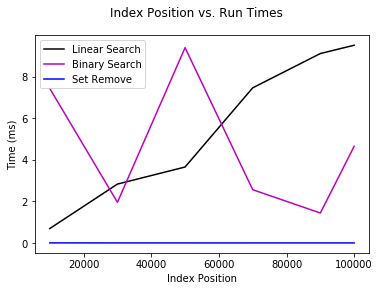

In [483]:
plt.plot('Position', 'Linear Search', data = df, color = 'k', label = "Linear Search")
plt.plot('Position', 'Binary Search', data = df, color = 'm', label = "Binary Search")
plt.plot('Position', 'Set Remove', data = df, color = 'b', label = "Set Remove")
plt.xlabel("Index Position")
plt.ylabel("Time (ms)")
plt.suptitle("Index Position vs. Run Times")
plt.legend()

### Executive Summary:

In this assignment, we created an unsorted list, a set, and a sorted list.  We then ran different sorting algorithms for each of these.  The first algorithm run was linear search, which was performed on the unsorted list.  Linear search runs at a speed of O(n).  This can be observed in the above plot, as the run times for each index position increase in a linear fashion.  The next algorithm run was binary search, which was performed on the sorted list.  Binary search runs at a speed of O(log n).  Since this was performed on a sorted list, the strings in the temporary array were in different positions.  As a result, the run times were more volatile.  The third algorithm run was set.remove() on a hash table.  Looking up a string in a hash table takes O(1) time.  This can be seen in the table and plot, as run times were constant.  The hash tables also ran significantly faster than the other algorithms.  Overall, set.remove() is the far superior option compared to linear search and binary search.